In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [5]:
# Read the City Data
city_data_df = pd.read_csv("city_data.csv")
city_data_df.head()

city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban

In [156]:
#Add the driver count of same cites in different rows (126 rows since Port James has a duplicate)
drivers_count = city_data_df.groupby("city")["driver_count"].sum()
city_data_new_df = pd.DataFrame({"Total Drivers Per City":drivers_count})
city_data_new_df = city_data_new_df.reset_index()
city_data_new_df.head()

city  Total Drivers Per City
0    Amandaburgh                      12
1    Barajasview                      26
2  Barronchester                      11
3    Bethanyland                      22
4   Bradshawfurt                       7

In [6]:
# Read the Ride Data
ride_data_df = pd.read_csv("ride_data.csv")
ride_data_df.head()

#ride_data_df.dtypes

city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344

In [7]:
# Merge ride data with city data
all_data2_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')
all_data2_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

In [114]:
# Average Fare ($) Per City
city_avg_fare =[]
city_avg_fare = ride_data_df.groupby("city")["fare"].mean()
#print(city_avg_fare)

# Total Number of Rides Per City
city_total_rides = ride_data_df.groupby("city")["fare"].count()
#print(city_total_rides)

# Total Number of Drivers Per City
city_total_drivers = ride_data_df.groupby("city")["fare"].count()
#print(city_total_drivers)

#Create a data frame of thes 3 lists
new_data_df = pd.DataFrame({"Average Fare Per City":city_avg_fare, "Total Rides Per City": city_total_rides, "Total Drivers Per City": city_total_drivers})

new_data_df = new_data_df.reset_index()
new_data_df.head()

city  Average Fare Per City  Total Rides Per City  \
0    Amandaburgh              24.641667                    18   
1    Barajasview              25.332273                    22   
2  Barronchester              36.422500                    16   
3    Bethanyland              32.956111                    18   
4   Bradshawfurt              40.064000                    10   

   Total Drivers Per City  
0                      18  
1                      22  
2                      16  
3                      18  
4                      10

In [157]:
# City Type (Urban, Suburban, Rural)
all_data_df = pd.merge(new_data_df, city_data_df, how='left')

all_data_df["Average Fare Per City"] = all_data_df["Average Fare Per City"].map("{:,.2f}".format)

# Convert Average fare Per City column to numberic
all_data_df["Average Fare Per City"] = pd.to_numeric(all_data_df["Average Fare Per City"], errors='ignore')
#all_data2_df.dtypes

all_data_df.head()

city  Average Fare Per City  Total Rides Per City  \
0    Amandaburgh                  24.64                    18   
1    Barajasview                  25.33                    22   
2  Barronchester                  36.42                    16   
3    Bethanyland                  32.96                    18   
4   Bradshawfurt                  40.06                    10   

   Total Drivers Per City  driver_count      type  
0                      18            12     Urban  
1                      22            26     Urban  
2                      16            11  Suburban  
3                      18            22  Suburban  
4                      10             7     Rural

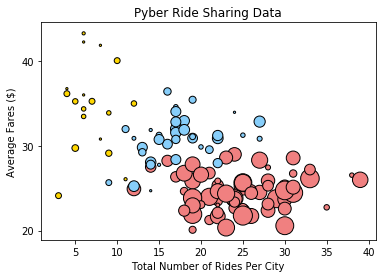

<Figure size 432x288 with 0 Axes>

In [159]:
# Create Bubble Plot

# Obtain the x and y coordinates for each of the three city types
# Urban data
urban_type_df = all_data2_df.loc[all_data2_df["type"] == "Urban",:]
urban_x_axis = urban_type_df["Total Rides Per City"]
urban_y_axis = urban_type_df["Average Fare Per City"]
urban_s = urban_type_df["driver_count"]
urban = plt.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors="lightcoral", edgecolors="black", s=(urban_s*5),\
                   label="Urban")
# Suburban data
suburban_type_df = all_data2_df.loc[all_data2_df["type"] == "Suburban",:]
suburban_x_axis = suburban_type_df["Total Rides Per City"]
suburban_y_axis = suburban_type_df["Average Fare Per City"]
suburban_s = suburban_type_df["driver_count"]
suburban = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors="lightskyblue", edgecolors="black", \
                       s=(suburban_s*5), label="Suburban")
# Rural data
rural_type_df = all_data2_df.loc[all_data2_df["type"] == "Rural",:]
rural_x_axis = rural_type_df["Total Rides Per City"]
rural_y_axis = rural_type_df["Average Fare Per City"]
rural_s = rural_type_df["driver_count"]
rural = plt.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors="gold", edgecolors="black", s=(rural_s*5),\
                    label="Rural")
# Labels
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fares ($)')
plt.title('Pyber Ride Sharing Data')
plt.yticks((40,30,20))

# Show plot
plt.show()
plt.savefig("../Desktop/PyberRideSharingData.png")
plt.show()

In [160]:
# % of Total Fares by City Type

# sum of fares by city type and total fare
sum_fare_type = all_data2_df.groupby('type')["Average Fare Per City"].count()
total_fare = all_data2_df["Average Fare Per City"].count()
#print(sum_fare_type)
#print(total_fare)

# % of Total Fares by City Type
percent_fares = sum_fare_type / total_fares * 100
#print(percent_fares)

fares_citytype_df = pd.DataFrame({"Fares by Type": sum_fare_type, "Percent Fare by Type (%)": percent_fares})
fares_citytype_df["Percent Fare by Type (%)"] = fares_citytype_df["Percent Fare by Type (%)"].map('{:.2f}'.format)

# converting the % fare to float
fares_citytype_df["Percent Fare by Type (%)"] = pd.to_numeric(fares_citytype_df["Percent Fare by Type (%)"], errors='ignore')

fares_citytype_df = fares_citytype_df.reset_index()
fares_citytype_df

type  Fares by Type  Percent Fare by Type (%)
0     Rural             18                      15.0
1  Suburban             36                      30.0
2     Urban             66                      55.0

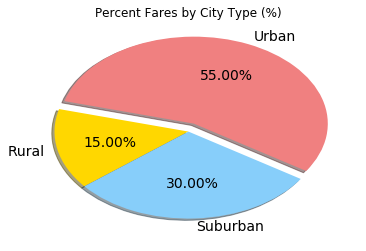

In [158]:
# Create PieChart for % of Total Fares by City Type
explode=[0, 0, 0.1]
ax = fares_citytype_df.plot(kind='pie', y = 'Percent Fare by Type (%)', autopct='%1.2f%%', startangle=165, shadow=True,\
                       labels=fares_citytype_df['type'], colors=["gold", "lightskyblue", 'lightcoral'],\
                       legend = False, fontsize=14, explode=explode)
#remove the yaxis label
ax.set_ylabel('')
plt.title("Percent Fares by City Type (%)")
plt.show()

In [161]:
# % of Total Rides by City Type

# count of rides by city type and total rides
count_rides_type = all_data2_df.groupby('type')["Total Rides Per City"].count()
total_rides = len(all_data2_df["Total Rides Per City"])
#print(count_rides_type)
#print(total_rides)

# % of Total Rides by City Type
percent_rides = count_rides_type / total_rides * 100
#print(percent_rides)

rides_citytype_df = pd.DataFrame({"Rides by Type": count_rides_type, "Percent Rides by Type (%)": percent_rides}, \
                                columns = ["Rides by Type", "Percent Rides by Type (%)"])
rides_citytype_df["Percent Rides by Type (%)"] = rides_citytype_df["Percent Rides by Type (%)"].map('{:.2f}'.format)

# converting the % ride to float
rides_citytype_df["Percent Rides by Type (%)"] = pd.to_numeric(rides_citytype_df["Percent Rides by Type (%)"], errors='ignore')

rides_citytype_df = rides_citytype_df.reset_index()
rides_citytype_df

type  Rides by Type  Percent Rides by Type (%)
0     Rural             18                       15.0
1  Suburban             36                       30.0
2     Urban             66                       55.0

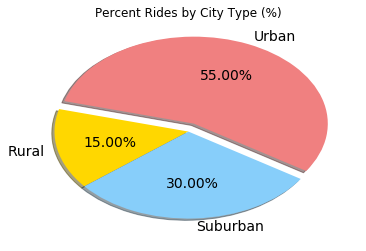

In [94]:
# Create PieChart for % of Total Rides by City Type
explode=[0, 0, 0.1]
ax = rides_citytype_df.plot(kind='pie', y = 'Percent Rides by Type (%)', autopct='%1.2f%%', startangle=165, shadow=True,\
                       labels=rides_citytype_df['type'], colors=["gold", "lightskyblue", 'lightcoral'], legend = False,\
                       fontsize=14, explode=explode)
ax.set_ylabel('')
plt.title("Percent Rides by City Type (%)")
plt.show()

In [167]:
# % of Total Drivers by City Type

# sum of drivers by city type and total drivers
sum_drivers_type = city_data_new2_df.groupby('type')["Total Drivers Per City"].sum()
total_drivers = city_data_new2_df["Total Drivers Per City"].sum()
#print(sum_drivers_type)
print(total_drivers)

# % of Total Drivers by City Type
percent_drivers = sum_drivers_type / total_drivers * 100
#print(percent_drivers)

drivers_citytype_df = pd.DataFrame({"Drivers by Type": sum_drivers_type, "Percent Drivers by Type (%)": percent_drivers}, \
                                columns = ["Drivers by Type", "Percent Drivers by Type (%)"])
drivers_citytype_df["Percent Drivers by Type (%)"] = drivers_citytype_df["Percent Drivers by Type (%)"].map('{:.2f}'.format)

# converting the % ride to float
drivers_citytype_df["Percent Drivers by Type (%)"] = pd.to_numeric(drivers_citytype_df["Percent Drivers by Type (%)"], \
                                                                   errors='ignore'
                                                                  
drivers_citytype_df = city_total_drivers_df.reset_index()
drivers_citytype_df

SyntaxError: invalid syntax (<ipython-input-167-620c773423d5>, line 19)

In [165]:
# Create PieChart for % of Total Drivers by City Type

explode=[0, 0, 0.1]
ax = city_data_new_df.plot(kind='pie', y = 'Percent Drivers by Type (%)', autopct='%1.2f%%', startangle=165, shadow=True,\
                       labels=city_data_new_df['type'], colors=["gold", "lightskyblue", 'lightcoral'], \
                         legend = False, fontsize=14, explode=explode)

ax.set_ylabel('')
plt.title("Percent Drivers by City Type (%)")
plt.show()

KeyError: 'type'